In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C
import tensorflow as tf
import pickle

2024-06-04 02:38:58.999995: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [4]:
images, labels = C.Helper.load_data(DATAPATH)

In [5]:
masks = C.Helper.load_seg_data(CAPATH)

In [6]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [7]:
with open('/raid/mpsych/CACTAS/DATA/HISTORY/unet_29/train_patient_order.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('/raid/mpsych/CACTAS/DATA/HISTORY/unet_29/test_patient_order.pkl', 'wb') as f:
    pickle.dump(X_test, f)

In [8]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

10769


In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13229, 512, 512, 1) (13229, 512, 512, 1) (3537, 512, 512, 1) (3537, 512, 512, 1)


In [11]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13229, 512, 512, 1) (3537, 512, 512, 1)


In [12]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
m_train = m_train.astype(np.float32)
m_test = m_test.astype(np.float32)

In [13]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(13229, 512, 512, 1) (3537, 512, 512, 1)


In [14]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2024-06-04 02:42:22.670426: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-06-04 02:42:23.023986: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-06-04 02:42:23.028119: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-06-04 02:42:23.028145: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-06-04 02:42:23.048647: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-06-04 

In [16]:
model.save('/raid/mpsych/CACTAS/DATA/HISTORY/unet_29/unet_model.h5')

In [17]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2024-06-04 02:42:26.410734: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-06-04 02:42:26.430783: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245740000 Hz


Epoch 1/200


2024-06-04 02:42:28.021953: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-06-04 02:42:28.652446: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-06-04 02:42:29.334378: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-06-04 02:42:29.334402: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-06-04 02:42:29.334457: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-06-04 02:42:29.408991: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-06-04 02:42:30.196830: I tensorflow/stream_exec

673/673 [==============================] - 316s 451ms/step - loss: 0.0888 - iou: 3.6340e-05 - iou_thresholded: 0.3547 - val_loss: 0.0032 - val_iou: 1.8607e-04 - val_iou_thresholded: 0.8090
Epoch 2/200
673/673 [==============================] - 302s 445ms/step - loss: 0.0015 - iou: 2.7898e-04 - iou_thresholded: 0.5175 - val_loss: 8.7501e-04 - val_iou: 0.0012 - val_iou_thresholded: 0.6859
Epoch 3/200
673/673 [==============================] - 299s 445ms/step - loss: 6.3945e-04 - iou: 7.2731e-04 - iou_thresholded: 0.5012 - val_loss: 3.7206e-04 - val_iou: 0.0010 - val_iou_thresholded: 0.7047
Epoch 4/200
673/673 [==============================] - 299s 445ms/step - loss: 2.6168e-04 - iou: 0.0017 - iou_thresholded: 0.4901 - val_loss: 2.1229e-04 - val_iou: 0.0017 - val_iou_thresholded: 0.8510
Epoch 5/200
673/673 [==============================] - 299s 445ms/step - loss: 1.6764e-04 - iou: 0.0035 - iou_thresholded: 0.4716 - val_loss: 1.4023e-04 - val_iou: 0.0036 - val_iou_thresholded: 0.8228
Epo

Epoch 42/200
673/673 [==============================] - 299s 444ms/step - loss: 1.3548e-05 - iou: 0.3198 - iou_thresholded: 0.7035 - val_loss: 4.3401e-05 - val_iou: 0.4417 - val_iou_thresholded: 0.8437
Epoch 43/200
673/673 [==============================] - 299s 444ms/step - loss: 1.4433e-05 - iou: 0.3193 - iou_thresholded: 0.6995 - val_loss: 5.1226e-05 - val_iou: 0.4485 - val_iou_thresholded: 0.8019
Epoch 44/200
673/673 [==============================] - 299s 444ms/step - loss: 1.2744e-05 - iou: 0.3336 - iou_thresholded: 0.6878 - val_loss: 5.0002e-05 - val_iou: 0.4368 - val_iou_thresholded: 0.8176
Epoch 45/200
673/673 [==============================] - 299s 444ms/step - loss: 1.7926e-05 - iou: 0.2577 - iou_thresholded: 0.6783 - val_loss: 4.8271e-05 - val_iou: 0.2971 - val_iou_thresholded: 0.8374
Epoch 46/200
673/673 [==============================] - 299s 444ms/step - loss: 1.4801e-05 - iou: 0.3024 - iou_thresholded: 0.7023 - val_loss: 4.9575e-05 - val_iou: 0.4408 - val_iou_thresholde

673/673 [==============================] - 299s 444ms/step - loss: 5.4055e-06 - iou: 0.6254 - iou_thresholded: 0.8572 - val_loss: 6.8043e-05 - val_iou: 0.6422 - val_iou_thresholded: 0.8269
Epoch 83/200
673/673 [==============================] - 299s 444ms/step - loss: 6.1042e-06 - iou: 0.6186 - iou_thresholded: 0.8534 - val_loss: 7.0536e-05 - val_iou: 0.6313 - val_iou_thresholded: 0.8392
Epoch 84/200
673/673 [==============================] - 299s 445ms/step - loss: 5.6563e-06 - iou: 0.6024 - iou_thresholded: 0.8554 - val_loss: 7.1675e-05 - val_iou: 0.6438 - val_iou_thresholded: 0.8157
Epoch 85/200
673/673 [==============================] - 299s 445ms/step - loss: 6.0956e-06 - iou: 0.6271 - iou_thresholded: 0.8615 - val_loss: 7.1096e-05 - val_iou: 0.6573 - val_iou_thresholded: 0.8451
Epoch 86/200
673/673 [==============================] - 299s 445ms/step - loss: 6.4859e-06 - iou: 0.5836 - iou_thresholded: 0.8367 - val_loss: 7.1591e-05 - val_iou: 0.6785 - val_iou_thresholded: 0.8366
Epo

673/673 [==============================] - 299s 444ms/step - loss: 4.1707e-06 - iou: 0.7083 - iou_thresholded: 0.8971 - val_loss: 8.4676e-05 - val_iou: 0.6752 - val_iou_thresholded: 0.8477
Epoch 123/200
673/673 [==============================] - 299s 444ms/step - loss: 3.9901e-06 - iou: 0.7454 - iou_thresholded: 0.9005 - val_loss: 9.3073e-05 - val_iou: 0.6809 - val_iou_thresholded: 0.8491
Epoch 124/200
673/673 [==============================] - 299s 444ms/step - loss: 4.1152e-06 - iou: 0.7243 - iou_thresholded: 0.8987 - val_loss: 8.9389e-05 - val_iou: 0.6349 - val_iou_thresholded: 0.8421
Epoch 125/200
673/673 [==============================] - 299s 444ms/step - loss: 8.2764e-06 - iou: 0.5683 - iou_thresholded: 0.8390 - val_loss: 7.1699e-05 - val_iou: 0.5573 - val_iou_thresholded: 0.8511
Epoch 126/200
673/673 [==============================] - 299s 444ms/step - loss: 4.4946e-06 - iou: 0.6750 - iou_thresholded: 0.8991 - val_loss: 7.5299e-05 - val_iou: 0.6189 - val_iou_thresholded: 0.8364

673/673 [==============================] - 299s 444ms/step - loss: 4.2271e-06 - iou: 0.7537 - iou_thresholded: 0.9106 - val_loss: 1.0128e-04 - val_iou: 0.5748 - val_iou_thresholded: 0.8169
Epoch 163/200
673/673 [==============================] - 299s 444ms/step - loss: 5.0589e-06 - iou: 0.6234 - iou_thresholded: 0.8505 - val_loss: 7.6250e-05 - val_iou: 0.6054 - val_iou_thresholded: 0.7935
Epoch 164/200
673/673 [==============================] - 299s 444ms/step - loss: 4.5895e-06 - iou: 0.7094 - iou_thresholded: 0.8994 - val_loss: 9.2902e-05 - val_iou: 0.6418 - val_iou_thresholded: 0.8177
Epoch 165/200
673/673 [==============================] - 299s 444ms/step - loss: 3.2093e-06 - iou: 0.7471 - iou_thresholded: 0.9129 - val_loss: 9.0606e-05 - val_iou: 0.5775 - val_iou_thresholded: 0.8254
Epoch 166/200
673/673 [==============================] - 299s 444ms/step - loss: 3.3664e-06 - iou: 0.7687 - iou_thresholded: 0.9236 - val_loss: 9.6082e-05 - val_iou: 0.6750 - val_iou_thresholded: 0.8148

In [18]:
with open('/raid/mpsych/CACTAS/DATA/HISTORY/unet_29/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

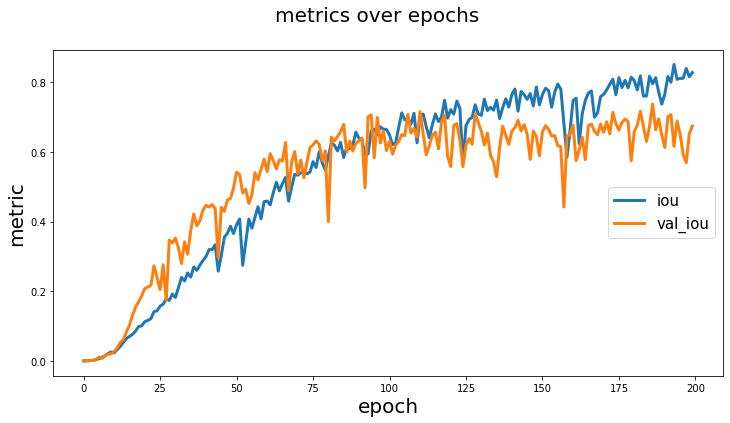

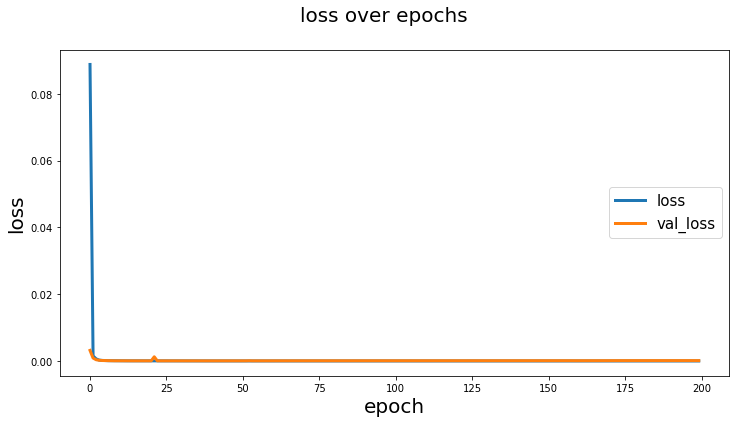

In [19]:
C.Helper.visualize_graph(history)

In [20]:
y_pred = C.Helper.prediction(test_images_array, model)

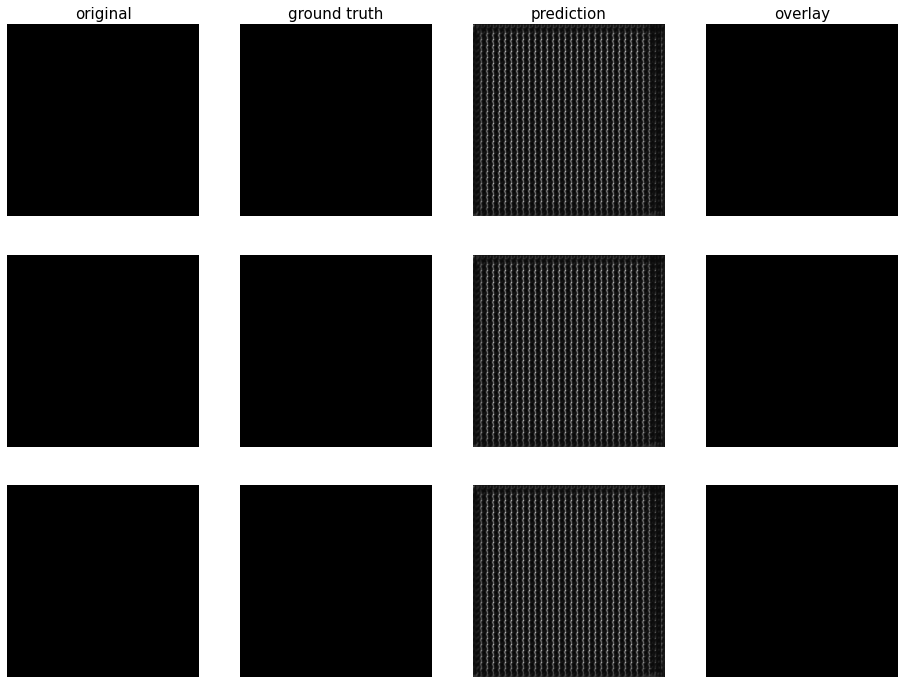

In [21]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

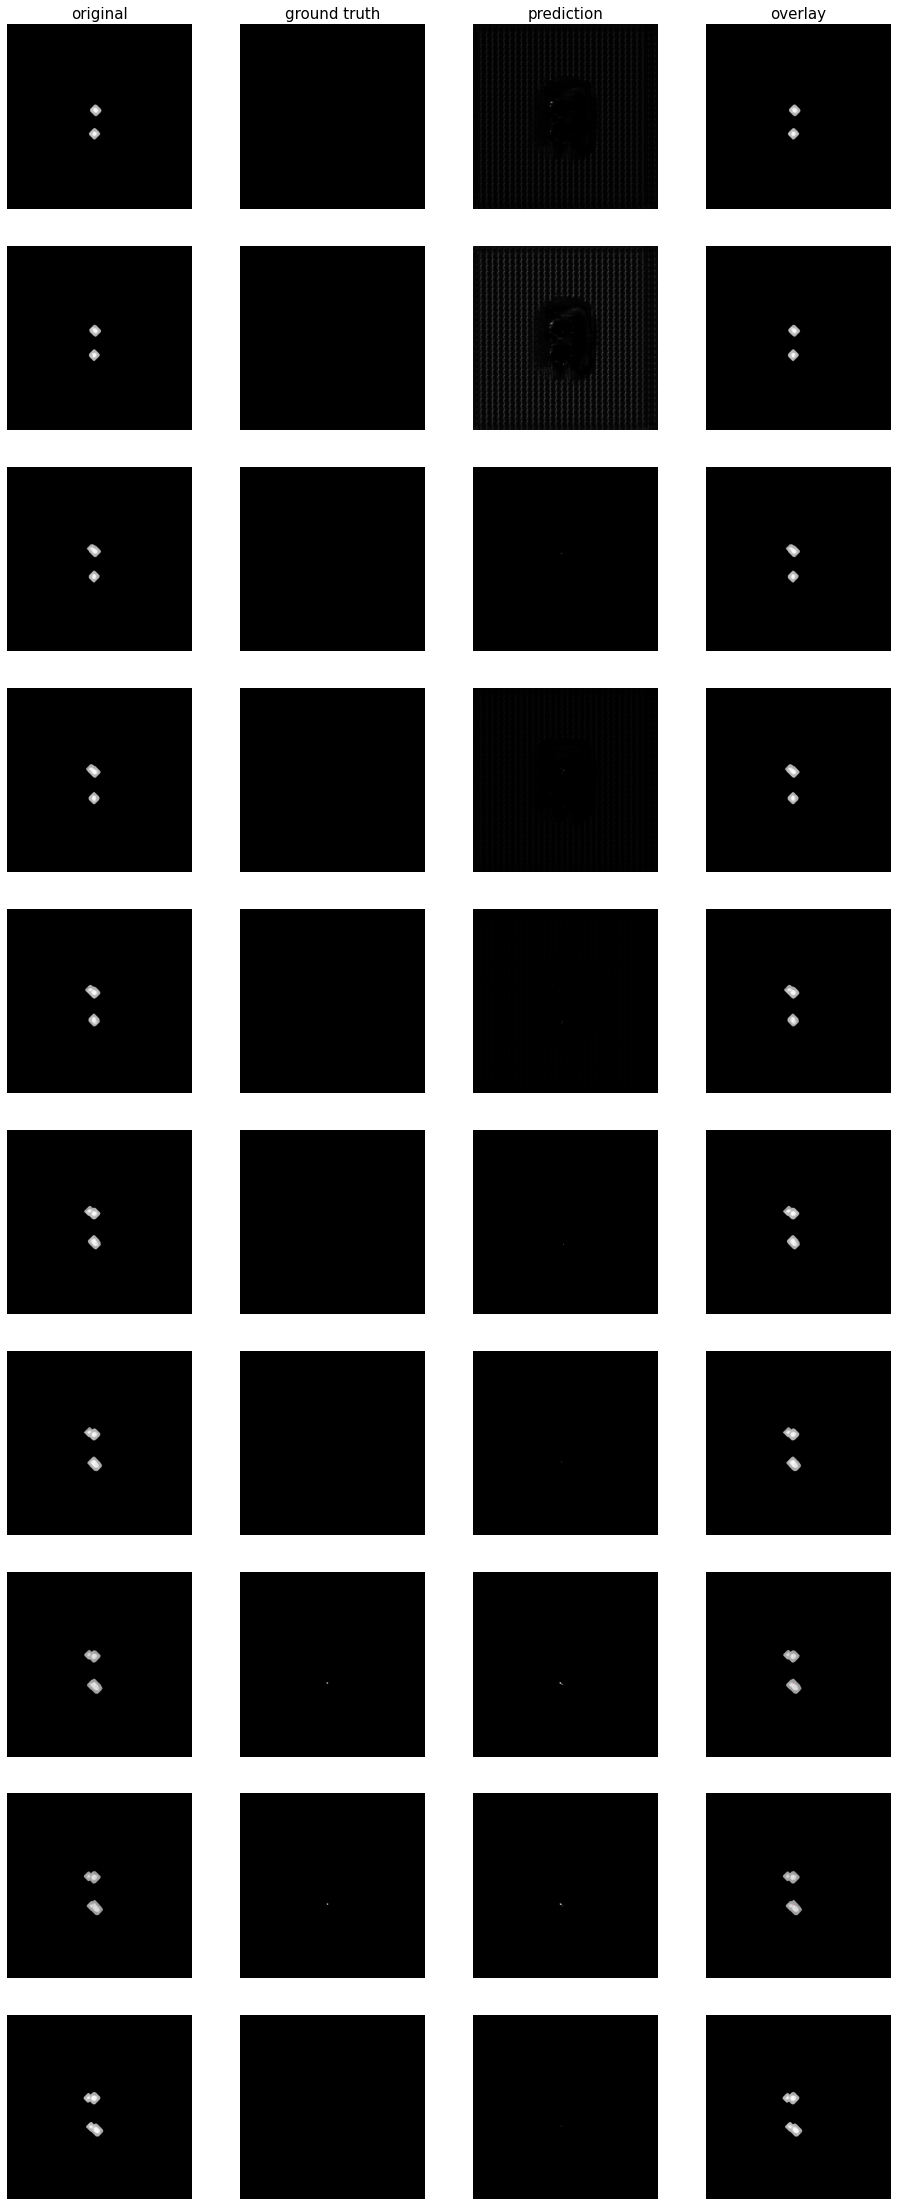

In [34]:
C.Helper.visualize_result_limit(test_images_array, y_test, y_pred, start_index=95, end_index=105)

In [23]:
C.Helper.evaluate(test_images_array, y_test, model)

111/111 [==============================] - 28s 254ms/step - loss: 4.1775e-05 - iou: 0.6086 - iou_thresholded: 0.8078


In [24]:
a = y_pred
a_binary = np.zeros(a.shape, dtype=np.bool_)
a_binary[a > 0.5] = True

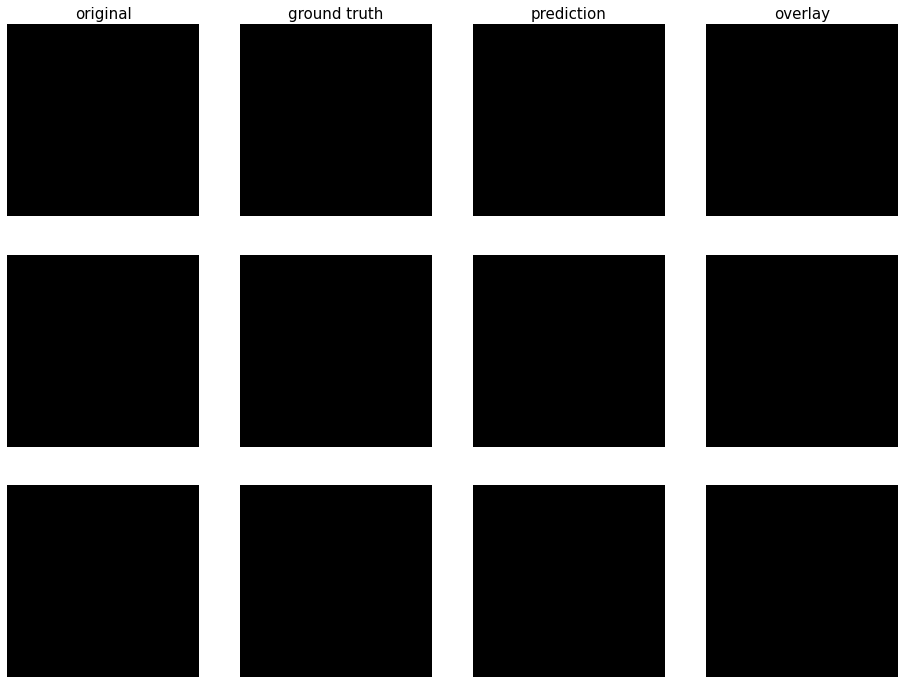

In [25]:
C.Helper.visualize_result(test_images_array, y_test, a_binary)

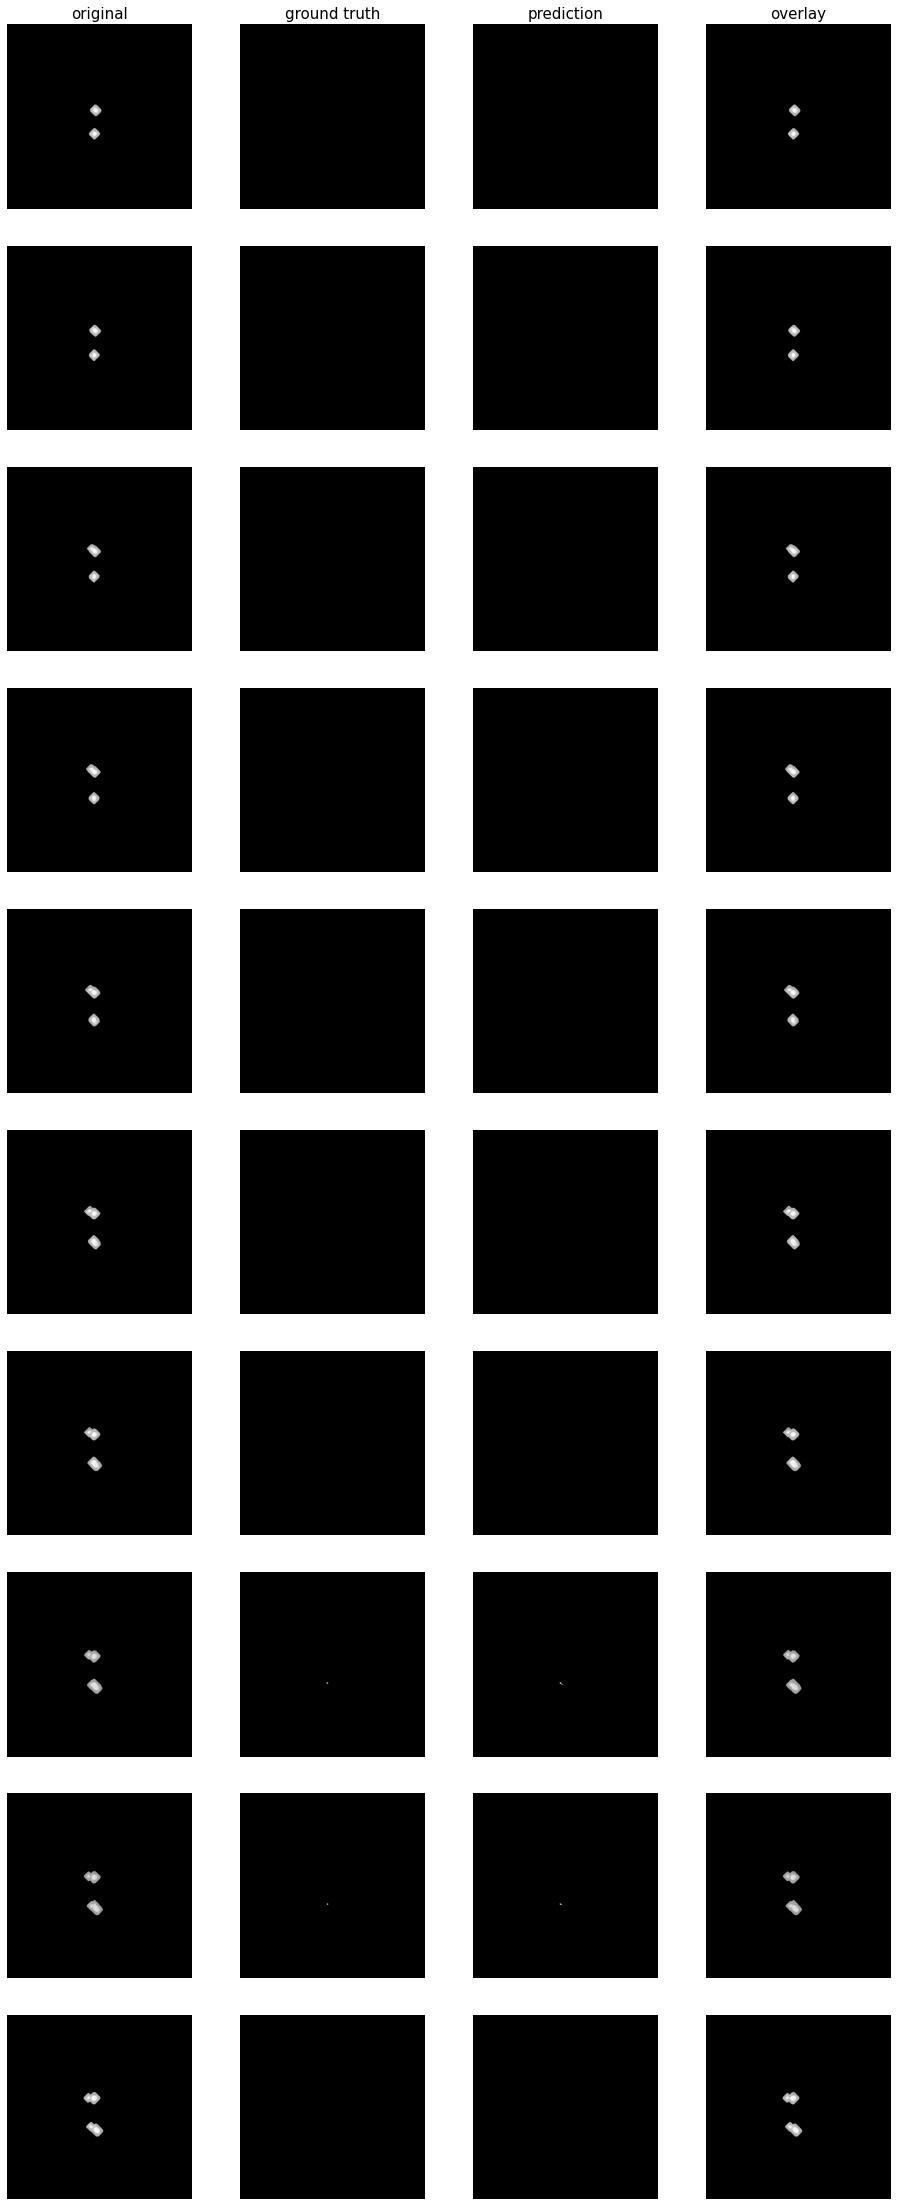

In [35]:
C.Helper.visualize_result_limit(test_images_array, y_test, a_binary, start_index=95, end_index=105)

In [27]:
C.Helper.evaluate(test_images_array, a_binary, model)

111/111 [==============================] - 28s 252ms/step - loss: 5.2414e-07 - iou: 0.7430 - iou_thresholded: 1.0000


In [28]:
experiment_data = {
    'slice_to_patient_mapping': slice_to_patient_mapping,
    'last_key': last_key,
    'predictions': y_pred,
    'y_pred_threshold': a_binary
}

In [29]:
experiment_data_path = '/raid/mpsych/CACTAS/DATA/HISTORY/unet_29/experiment_data.pkl'

In [30]:
with open(experiment_data_path, 'wb') as f:
    pickle.dump(experiment_data, f)

In [36]:
path = '/raid/mpsych/CACTAS/DATA/HISTORY/'

In [37]:
with open(path + 'unet_29/train_patient_order.pkl', 'rb') as f:
    train = pickle.load(f)

with open(path + 'unet_29/test_patient_order.pkl', 'rb') as f:
    test = pickle.load(f)
    
with open(path + 'unet_29/training_history.pkl', 'rb') as f:
    history = pickle.load(f)

with open(path + 'unet_29/experiment_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [38]:
data['last_key']

10769